# Name -- ADVAIT GURUNATH CHAVAN
# Email -- advaitchavan135@gmail.com

## Task -- 1
### Download the monthly natural gas price data.
### Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
### Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
### Your code should take a date as input and return a price estimate.
### Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for

In [3]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
# Reading the data file
df = pd.read_csv("Nat_Gas.csv", parse_dates=["Dates"])

C:\Users\Gurunath Chavan\AppData\Local\Temp\ipykernel_29572\1796319594.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("Nat_Gas.csv", parse_dates=["Dates"])


In [15]:
df = df.sort_values("Dates").set_index("Dates")

In [16]:
df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


In [17]:
df.tail()

,Prices
Dates,
2024-05-31,11.4
2024-06-30,11.5
2024-07-31,11.6
2024-08-31,11.5
2024-09-30,11.8


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [18]:
df.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


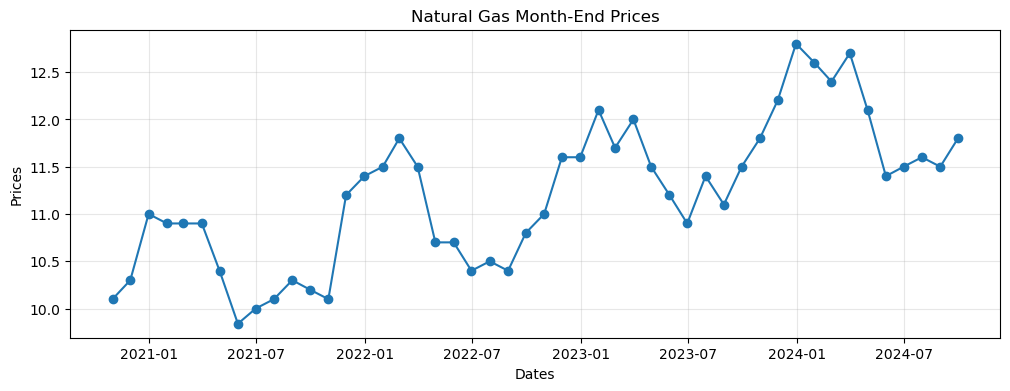

In [19]:
# Plot time series
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["Prices"], marker="o")
plt.title("Natural Gas Month-End Prices")
plt.ylabel("Prices")
plt.xlabel("Dates")
plt.grid(alpha=0.3)
plt.show()

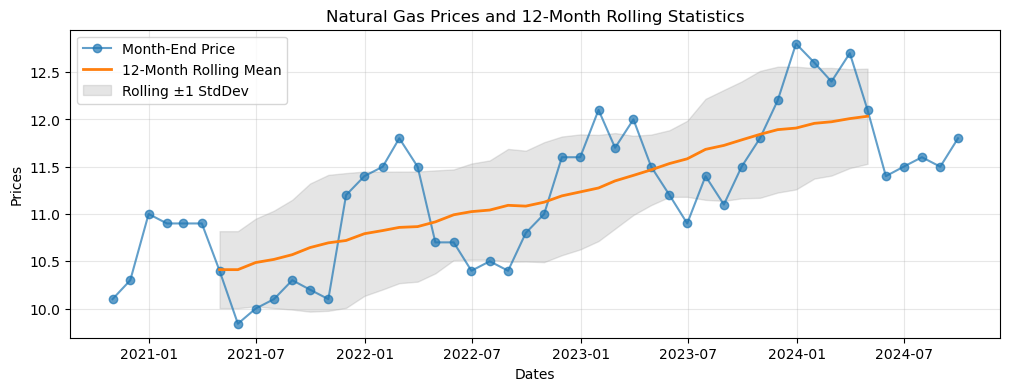

In [27]:
# Compute rolling statistics
rolling_mean = y.rolling(window=12, center=True).mean()
rolling_std  = y.rolling(window=12, center=True).std()

# Plot
plt.figure(figsize=(12,4))
plt.plot(y, label="Month-End Price", marker="o", alpha=0.7)
plt.plot(rolling_mean, label="12-Month Rolling Mean", linewidth=2)
plt.fill_between(rolling_std.index,
                 rolling_mean - rolling_std,
                 rolling_mean + rolling_std,
                 color="gray", alpha=0.2,
                 label="Rolling ±1 StdDev")
plt.title("Natural Gas Prices and 12-Month Rolling Statistics")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### This line plot with a centered 12-month rolling mean reveals a longer-term trend and periods of elevated volatility. Peaks often align with sharp cold snaps or supply disruptions.

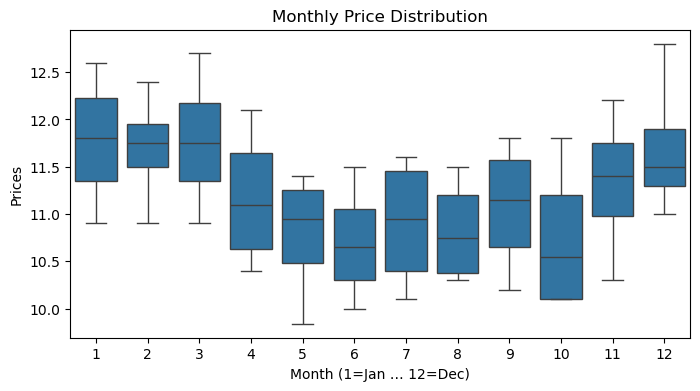

In [20]:
# Boxplot by month to expose seasonality
df["Month"] = df.index.month
plt.figure(figsize=(8, 4))
sns.boxplot(x="Month", y="Prices", data=df.reset_index())
plt.title("Monthly Price Distribution")
plt.xlabel("Month (1=Jan … 12=Dec)")
plt.ylabel("Prices")
plt.show()

### Winter‐heating demand and summer‐cooling/storage cycles drive the 12-month pattern.

### The boxplot shows a clear winter peak (months 1–3) and a secondary uptick in late autumn (months 10–11). This reflects higher heating‐demand and storage refill cycles.

## Seasonal Decomposition

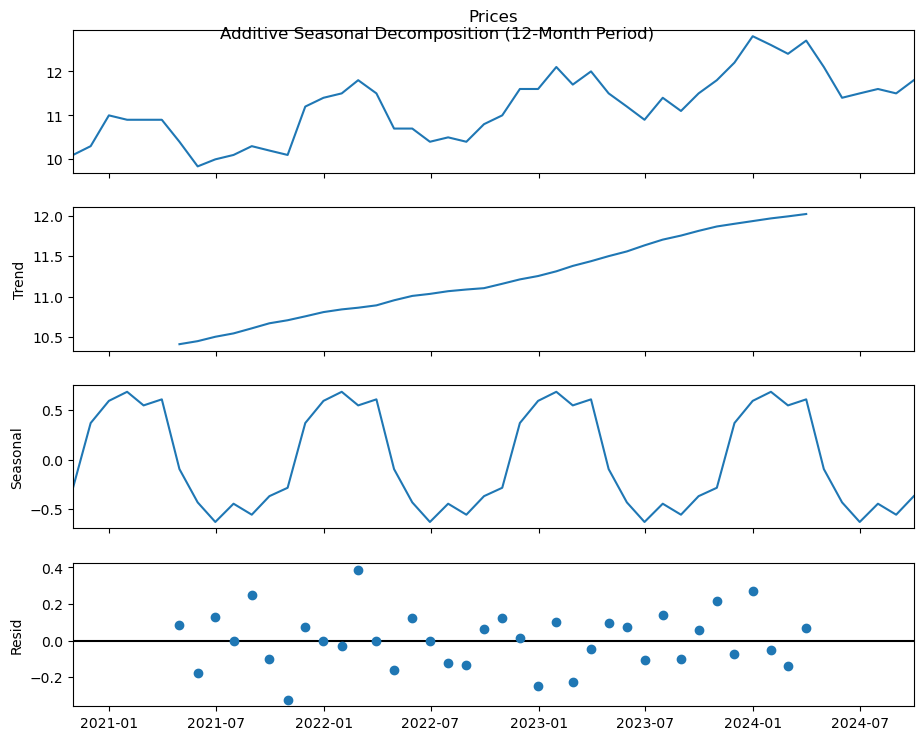

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(y, model="additive", period=12)
fig = decomp.plot()
fig.set_size_inches(10, 8)
plt.suptitle("Additive Seasonal Decomposition (12-Month Period)", y=0.93)
plt.show()


### Decomposition splits the series into:
### 
### trend component showing multi-year drift,
### 
### seasonal component peaking in winter,
### 
### residual highlighting anomaly spikes (e.g., geopolitical shocks).

## Autocorrelation Analysis

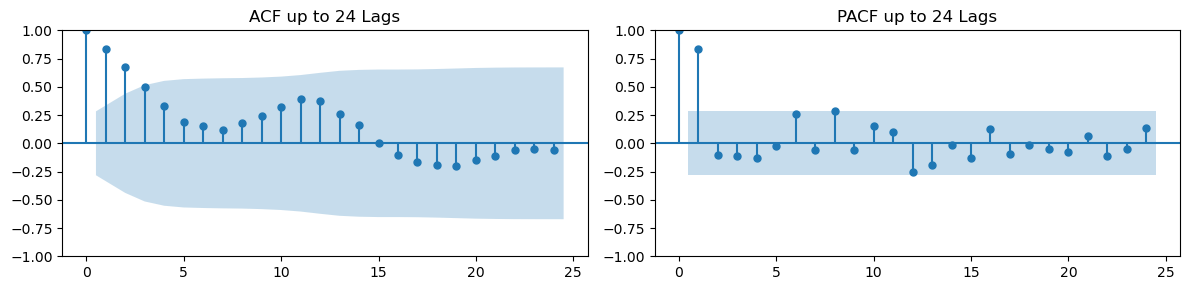

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12,3))
plot_acf(y, lags=24, ax=axes[0], title="ACF up to 24 Lags")
plot_pacf(y, lags=24, ax=axes[1], title="PACF up to 24 Lags")
plt.tight_layout()
plt.show()


### Strong autocorrelation at lag 12 confirms yearly seasonality. Significant spikes at lag 1–2 indicate momentum and short-term persistence.

### Factors Driving Price Variations
### Seasonal demand cycles winter heating vs summer storage injections### 

### Weather anomalies cold snaps, heat waves, hurricanes impacting supply/destruction### 

### Inventory and storage levels reported weekly inventories influence market sentiment### 

### Production and pipeline constraints maintenance shutdowns, LNG shipments, pipeline outages### 

### Geopolitical events sanctions, trade disputes, export restrictions### 

### Macroeconomic activity industrial demand, GDP growth rates### 

### Energy policy and regulations carbon pricing, subsidy changes, renewable‐gas mandates### 

### Currency fluctuations USD strength affects global commodity pricing

## Fit a Seasonal ARIMA (SARIMAX) Model

In [21]:
import statsmodels.api as sm

#  Prepare endog series
y = df["Prices"]

#  Configure SARIMAX(p,d,q)x(P,D,Q,12)
model = sm.tsa.SARIMAX(
    y,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
res = model.fit(disp=False)
print(res.summary())


C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             Prices   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   1.581
Date:                            Tue, 09 Sep 2025   AIC                              6.838
Time:                                    21:39:52   BIC                             12.061
Sample:                                10-31-2020   HQIC                             7.972
                                     - 09-30-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4532      0.301     -1.505      0.132      -1.044       0.137
ma.L1         -0.5152      0.344   

## Forecast Next 12 Month-Ends

In [32]:
# Determine next 12 month-end dates
last_date = df.index.max()
future_dates = pd.date_range(
    start=last_date + pd.offsets.MonthEnd(1),
    periods=12,
    freq='ME'
)

# Forecast month-end prices
forecast = res.get_forecast(steps=12)
pred_monthly = pd.Series(
    forecast.predicted_mean.values,
    index=future_dates,
    name="Price"
)

# Combine history + forecast
full_monthly = pd.concat([y, pred_monthly])


## Build Daily-Frequency Series (Linear Interpolation)

In [23]:
# Create daily index spanning past through one year out
daily_index = pd.date_range(
    start=full_monthly.index.min(),
    end=full_monthly.index.max(),
    freq='D'
)

# Reindex and interpolate
daily_series = full_monthly.reindex(daily_index).interpolate(method='time')


In [24]:
daily_series

2020-10-31    10.100000
2020-11-01    10.106667
2020-11-02    10.113333
2020-11-03    10.120000
2020-11-04    10.126667
                ...    
2025-09-26    12.285505
2025-09-27    12.297010
2025-09-28    12.308516
2025-09-29    12.320021
2025-09-30    12.331527
Freq: D, Length: 1796, dtype: float64

## Function to take a date as input and return a price estimate.

In [25]:
from datetime import datetime

def get_price_estimate(date_str: str) -> float:
    """
    Estimate natural-gas price for any date (past or next year).
    
    Args:
      date_str: "YYYY-MM-DD"
    Returns:
      Estimated price (float).
    """
    dt = pd.to_datetime(date_str)
    if dt < daily_series.index.min() or dt > daily_series.index.max():
        raise ValueError("Date out of supported range.")
    return float(daily_series.loc[dt])


In [26]:
# Example usage:
print("Estimate on 2023-07-15:", get_price_estimate("2023-07-15"))
print("Estimate on 2025-03-01:", get_price_estimate("2025-03-01"))


Estimate on 2023-07-15: 11.141935483870968
Estimate on 2025-03-01: 12.770900240369766
